In [70]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [71]:
data = pd.read_csv('resources/movies_training.csv', index_col=0)

In [72]:
data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'G', 'PG', 'PG-13', 'R',
       'gross'],
      dtype='object')

In [73]:
data['G_budget'] = data['G'] * data['budget']
data['PG_budget'] = data['PG'] * data['budget']
data['PG-13_budget'] = data['PG-13'] * data['budget']
data['R_budget'] = data['R'] * data['budget']

In [74]:
data = data[data['actor_1_facebook_likes']<300000]

In [75]:
data.drop(['cast_total_facebook_likes'],axis = 1, inplace = True)

In [76]:
extreme_cols = ['budget', 'director_facebook_likes', 'actor_3_facebook_likes']

In [77]:
def ext_values(df, extreme_cols):
    new_df = df.copy()
    for col in extreme_cols:
        std = new_df[col].std()
        mean = new_df[col].mean()
        value = mean+(4*std)
        new_df[col] = new_df[col].apply(lambda x: value if (x > 4*std) else x)
    return new_df

In [78]:
data = ext_values(data, extreme_cols)

## Determine our best model 

Do we want to transform the target variable by taking the log or square root of it?

In [79]:
target = data['gross']
features = data.drop(['gross'], axis=1)


Create a train test split of our data.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)


How do you want to handle extreme values for some of the continuous columns?

Create any polynomial or interaction terms?

What type of scaler do we want to use?

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

What feature selection methods will we implement?

Fit our model

In [88]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 28310830.045825455
Testing Error: 60974887.16516818


/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7104279486761472e+16, tolerance: 884195721150477.4
  positive)


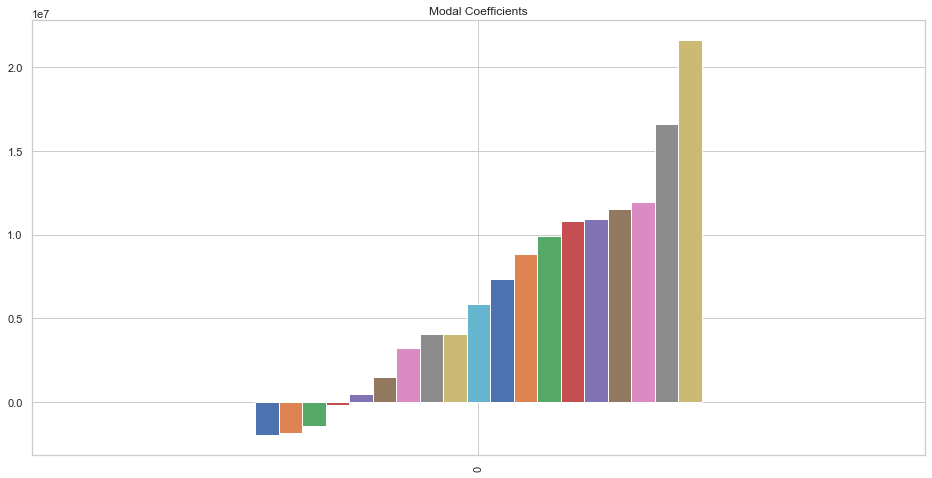

In [89]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

Evaluate how our model performance on the test set. 

## Once we are happy with our performance and have solidified the process, let's refit this process to the entire dataset.  

## Now with our model including more data points, let's apply it to the holdout set. 

In [15]:
holdout = pd.read_csv('resources/movies_holdout_features.csv', index_col=0)

Remember we have to perform the same transformations on our holdout data (feature engineering, extreme values and scaling) that we performed on the original data.  

Predict using the fitted model. 

Grade our predictions.  